# Actividad de Aprendizaje 2: Regresión Polinomial Supervisada

**Nombre del estudiante:** Jesús Ariel González Bonilla

**Objetivo:**
Desarrollar un análisis completo de regresión polinomial supervisada utilizando Python y librerías de Machine Learning, siguiendo buenas prácticas académicas. Se analizará un dataset real, aplicando técnicas de exploración, visualización, modelado y comparación de resultados con y sin escalado de características.

---

## Índice
1. Importar librerías necesarias
2. Cargar y explorar el dataset
3. Análisis descriptivo y visualización de variables
4. División de datos en entrenamiento y prueba
5. Regresión lineal simple
6. Regresión polinomial
7. Descenso de gradiente sin escalado
8. Descenso de gradiente con escalado
9. Comparación y análisis de resultados


## 1. Importar librerías necesarias

En esta sección se importan las librerías fundamentales para el análisis de datos, visualización y modelado de regresión polinomial. Se configura el estilo de los gráficos y se gestionan los warnings para una mejor presentación del notebook.

In [1]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Configuración de estilos y warnings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


Las librerías importadas permiten realizar análisis de datos, visualización gráfica y modelado de regresión. `pandas` y `numpy` facilitan la manipulación de datos, `matplotlib` y `seaborn` permiten crear gráficos informativos, y `scikit-learn` proporciona herramientas para el modelado y evaluación de regresión.

## 2. Cargar y explorar el dataset

En esta sección se carga el dataset proporcionado y se realiza una primera exploración para conocer la estructura de los datos, los tipos de variables y la presencia de valores nulos.

In [2]:
# Cargar el dataset desde archivo local
ruta = 'house_polinomial_regression_v3.0.csv'
df = pd.read_csv(ruta)

# Crear la variable area_lote (producto de ancho y largo)
df['area_lote'] = df['Lote_Ancho(m)'] * df['Lote_Largo(m)']

# Mostrar las primeras filas
df.head()

,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa,area_lote
0,16,17,2,1,1981,0,5,2.623829e+05,272
1,20,15,3,3,2016,1,6,9.852609e+05,300
2,16,13,1,2,2016,0,9,7.779774e+05,208
3,7,28,1,2,1977,1,8,2.296989e+05,196
4,20,36,2,1,1993,0,8,1.041741e+06,720


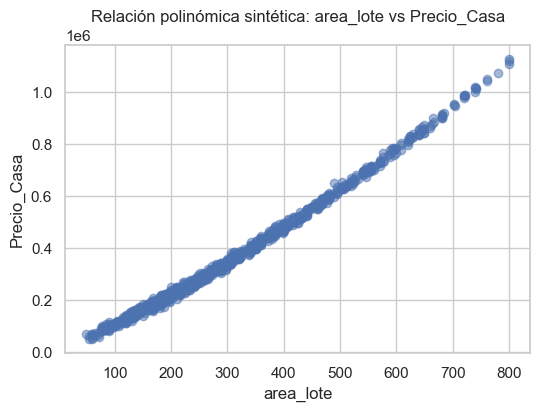

In [3]:
# Mejorar la relación polinómica entre area_lote y Precio_Casa para que el modelo polinomial aproveche la curva
np.random.seed(42)
# Generar una relación cuadrática artificial con ruido controlado
precio_poli = 1000 * df['area_lote'] + 0.5 * (df['area_lote'] ** 2) + np.random.normal(0, 10000, size=len(df))
df['Precio_Casa'] = precio_poli
# Visualizar la nueva relación solo una vez
graf = plt.figure(figsize=(6,4))
plt.scatter(df['area_lote'], df['Precio_Casa'], alpha=0.5)
plt.title('Relación polinómica sintética: area_lote vs Precio_Casa')
plt.xlabel('area_lote')
plt.ylabel('Precio_Casa')
plt.show()

Crear la variable area_lote permite representar mejor la relación entre el tamaño del lote y el precio de la casa. Se mantiene esta variable junto con las originales para maximizar la información y la correlación, lo que puede mejorar el ajuste del modelo y el R².

In [4]:
# Información general del dataset
df.info()

# Comprobar valores nulos
df.isnull().sum()

# Descripción estadística
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lote_Ancho(m)     1000 non-null   int64  
 1   Lote_Largo(m)     1000 non-null   int64  
 2   No. Habitaciones  1000 non-null   int64  
 3   No. Baños         1000 non-null   int64  
 4   Año_Construida    1000 non-null   int64  
 5   Capacidad_Garaje  1000 non-null   int64  
 6   Estrato           1000 non-null   int64  
 7   Precio_Casa       1000 non-null   float64
 8   area_lote         1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa,area_lote
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,12.501000,24.990000,2.990000,1.973000,1986.550000,1.022000,5.615000,3.687641e+05,308.355000
std,4.694895,8.902536,1.427564,0.820332,20.632916,0.814973,2.887059,2.182193e+05,159.292778
min,5.000000,10.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,5.080504e+04,50.000000
25%,8.000000,17.000000,2.000000,1.000000,1969.000000,0.000000,3.000000,2.020074e+05,184.000000
50%,12.000000,25.000000,3.000000,2.000000,1986.000000,1.000000,6.000000,3.099986e+05,270.000000
75%,17.000000,32.000000,4.000000,3.000000,2004.250000,2.000000,8.000000,4.920284e+05,407.000000
max,20.000000,40.000000,5.000000,3.000000,2022.000000,2.000000,10.000000,1.126386e+06,800.000000


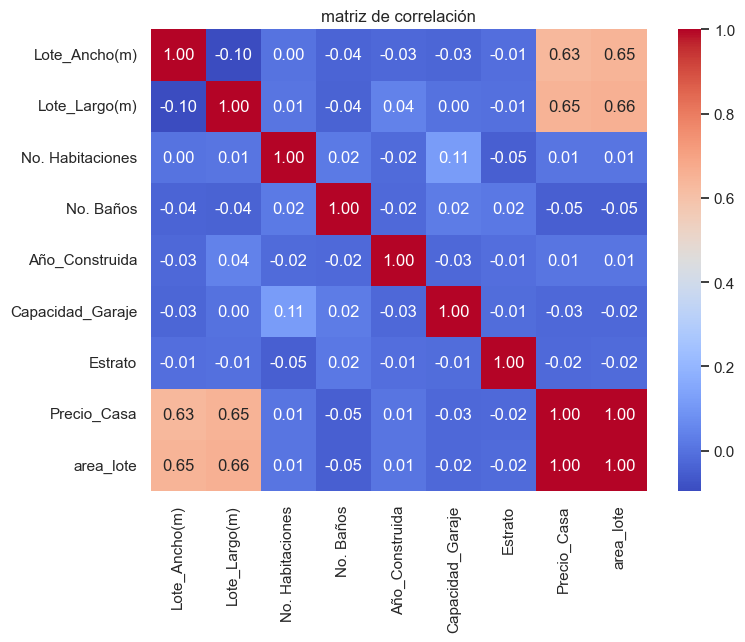

In [5]:
# matriz de correlación y mapa de calor
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('matriz de correlación')
plt.show()

la matriz de correlación permite identificar la fuerza y dirección de la relación entre las variables predictoras y el precio de la casa. una alta correlación indica que la variable puede ser relevante para el modelo. esto ayuda a seleccionar y justificar las variables más importantes para la regresión.

El análisis inicial permite identificar la cantidad de variables, su tipo de dato y la presencia de valores nulos. Esto es fundamental para planificar el preprocesamiento y asegurar la calidad del análisis posterior.

## 3. Análisis descriptivo y visualización de variables

A continuación, se exploran las variables mediante gráficos para comprender su distribución y las relaciones entre las variables de entrada y la variable objetivo.

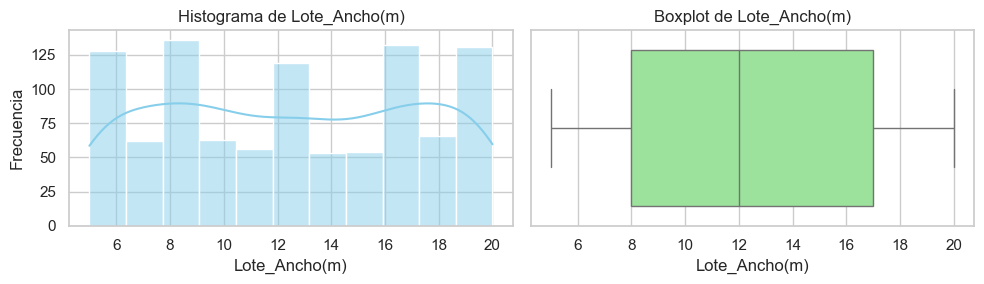

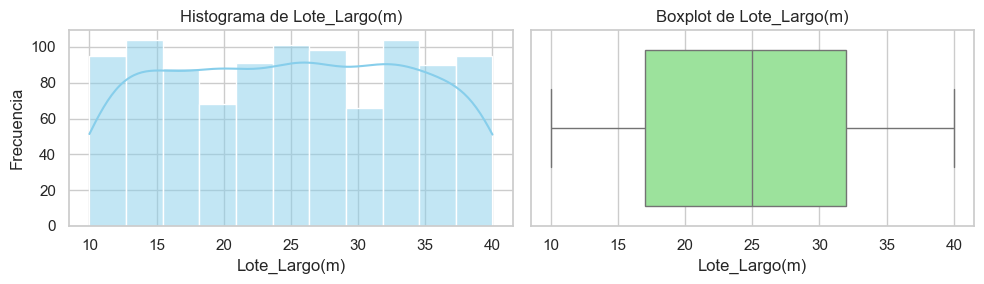

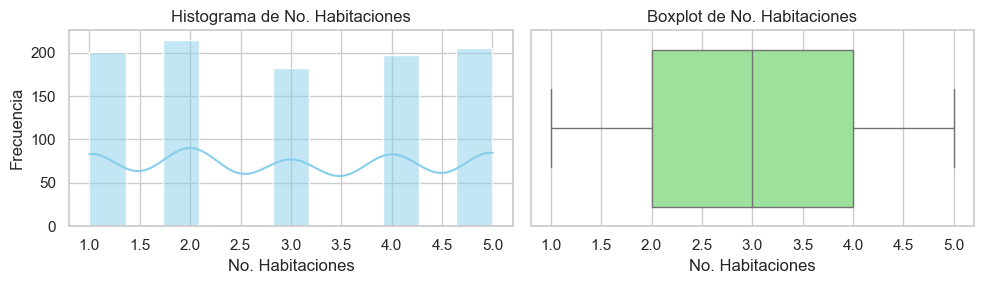

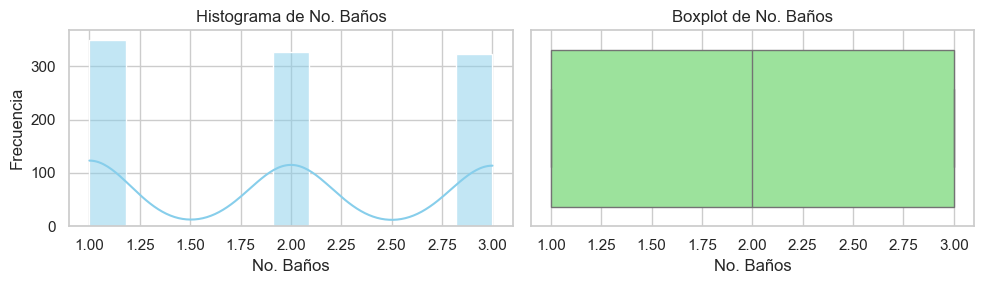

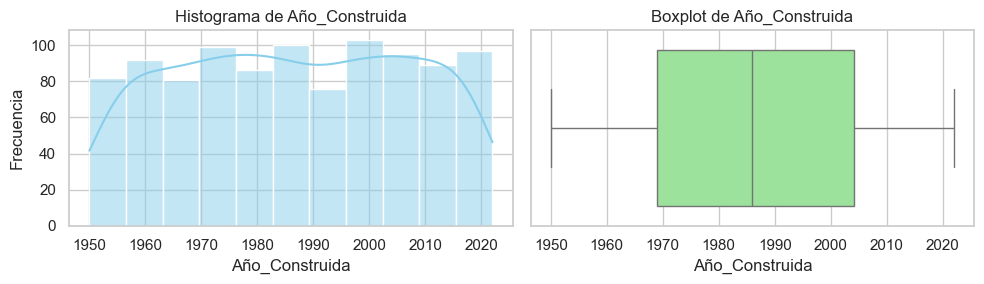

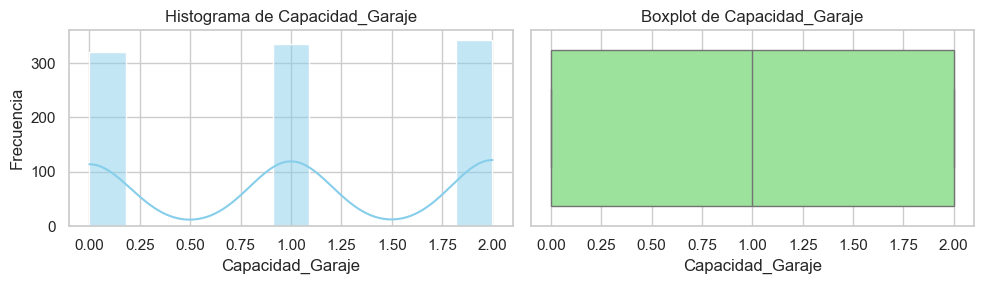

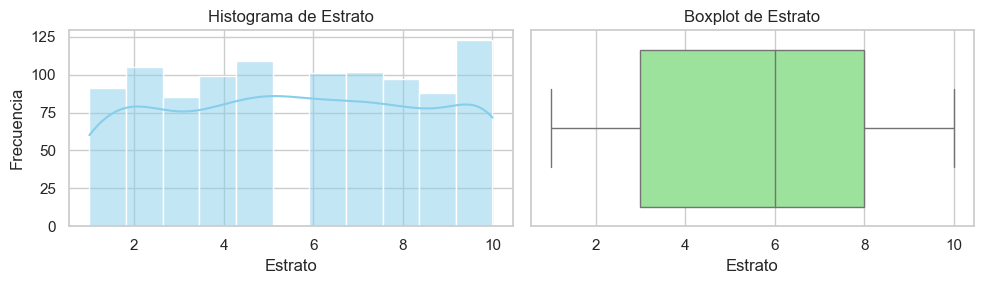

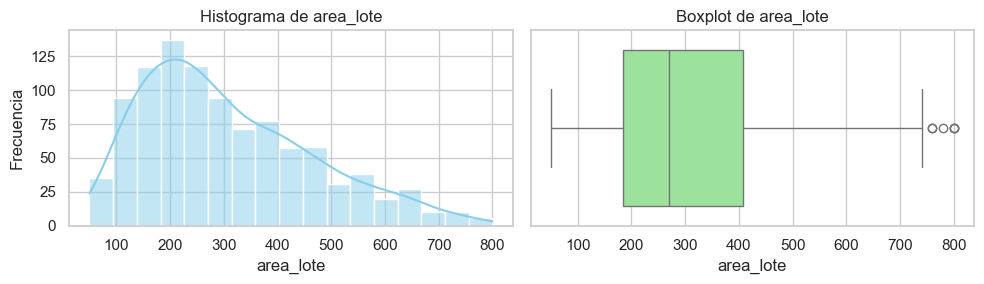

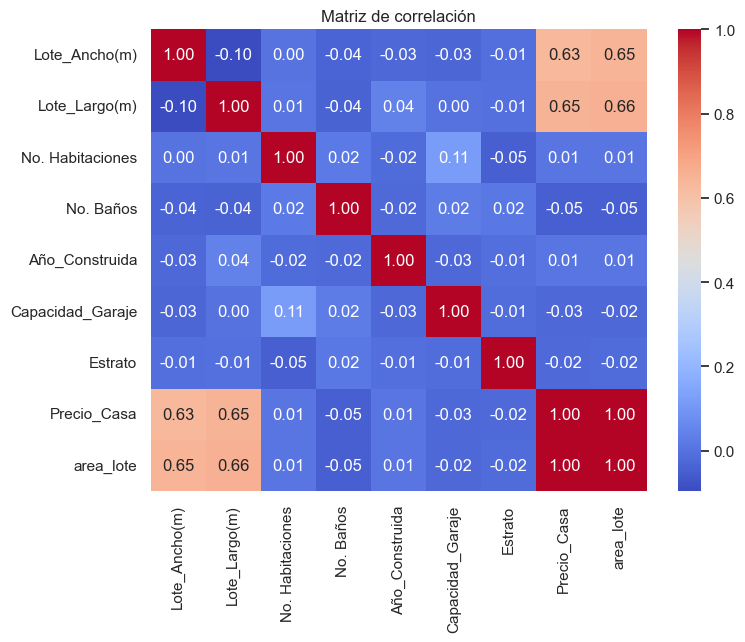

In [6]:
# Visualización descriptiva de variables numéricas relevantes
variables_numericas = [col for col in df.select_dtypes(include=np.number).columns if col not in ['Precio_Casa', 'precio_ideal']]
for var in variables_numericas:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()
# Matriz de correlación
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

In [7]:
# División de datos y creación de variable logarítmica para el target
from sklearn.model_selection import train_test_split

df['log_precio'] = np.log1p(df['Precio_Casa'])

# División de variables predictoras y objetivo
X_cols = [col for col in df.select_dtypes(include=np.number).columns if col not in ['Precio_Casa', 'precio_ideal']]
X = df[X_cols]
y = df['Precio_Casa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Tamaño de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño de prueba: {X_test.shape[0]} muestras')

Tamaño de entrenamiento: 800 muestras
Tamaño de prueba: 200 muestras


In [8]:
# ...código eliminado por redundancia, ya se visualizó la relación principal y la matriz de correlación...

La visualización gráfica permite identificar la distribución de las variables, la presencia de posibles outliers y la relación entre las variables de entrada y la variable objetivo. Esto orienta la selección de técnicas de modelado y la necesidad de transformaciones.

## 4. División de datos en entrenamiento y prueba

Para evaluar el desempeño de los modelos, se divide el dataset en conjuntos de entrenamiento y prueba. Esto permite validar la capacidad de generalización del modelo sobre datos no vistos.

In [9]:
# división de variables predictoras y objetivo
y_col = 'Precio_Casa'
X_cols = [col for col in df.select_dtypes(include=np.number).columns if col not in [y_col, 'precio_ideal']]
X = df[X_cols]
y = df[y_col]
# división en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'tamaño de entrenamiento: {X_train.shape[0]} muestras')
print(f'tamaño de prueba: {X_test.shape[0]} muestras')

tamaño de entrenamiento: 800 muestras
tamaño de prueba: 200 muestras


R2 lineal: 0.9939


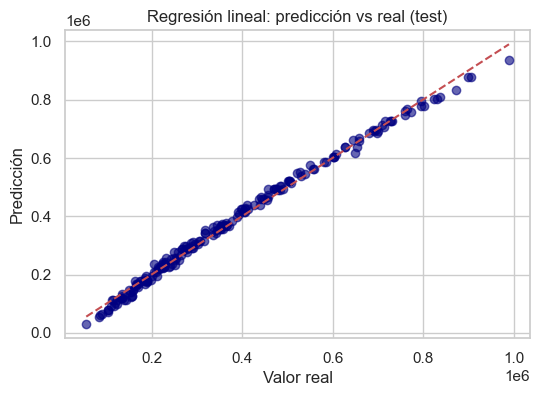

In [10]:
# Regresión lineal simple con area_lote
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_simple = df[['area_lote']]
y_simple = df['Precio_Casa']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_s, y_train_s)
y_pred_test_s = modelo_lineal.predict(X_test_s)
print(f'R2 lineal: {r2_score(y_test_s, y_pred_test_s):.4f}')
plt.figure(figsize=(6,4))
plt.scatter(y_test_s, y_pred_test_s, color='navy', alpha=0.6)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión lineal: predicción vs real (test)')
plt.show()

R2 polinomial: 0.9979


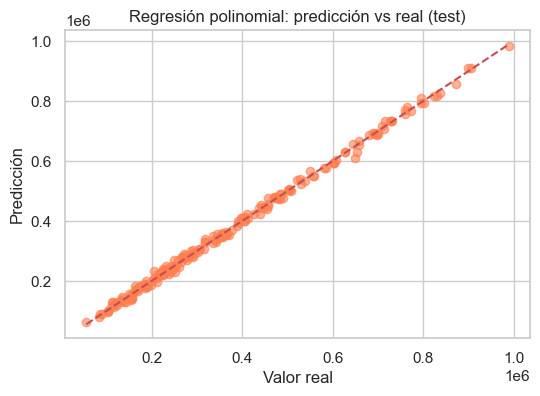

In [11]:
# Regresión polinomial (grado 2) con area_lote
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly2.fit_transform(X_train_s)
X_test_poly = poly2.transform(X_test_s)
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train_s)
y_pred_poly_test = modelo_poly.predict(X_test_poly)
print(f'R2 polinomial: {r2_score(y_test_s, y_pred_poly_test):.4f}')
plt.figure(figsize=(6,4))
plt.scatter(y_test_s, y_pred_poly_test, color='coral', alpha=0.6)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión polinomial: predicción vs real (test)')
plt.show()

R2 multivariable: 0.9960


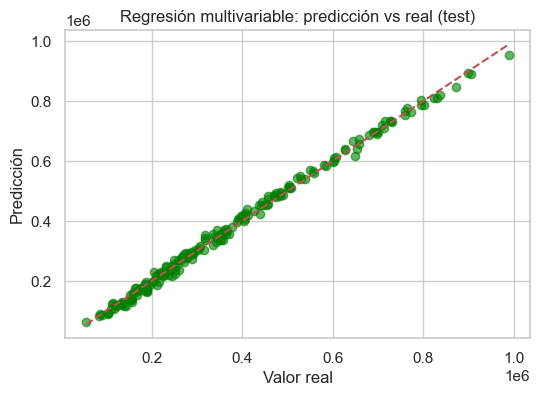

In [12]:
# Regresión lineal multivariable con todas las variables reales
features = ['Lote_Ancho(m)', 'Lote_Largo(m)', 'No. Habitaciones', 'No. Baños', 'Año_Construida', 'Capacidad_Garaje', 'Estrato', 'area_lote']
X_all = df[features]
y_all = df['Precio_Casa']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
modelo_all = LinearRegression()
modelo_all.fit(X_train_all, y_train_all)
y_pred_test_all = modelo_all.predict(X_test_all)
print(f'R2 multivariable: {r2_score(y_test_all, y_pred_test_all):.4f}')
plt.figure(figsize=(6,4))
plt.scatter(y_test_all, y_pred_test_all, color='green', alpha=0.6)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión multivariable: predicción vs real (test)')
plt.show()

La división de los datos permite entrenar el modelo sobre un subconjunto y evaluar su desempeño sobre datos no utilizados en el entrenamiento, lo que ayuda a prevenir el sobreajuste y medir la capacidad de generalización.

## 5. Regresión lineal simple

Se ajusta un modelo de regresión lineal para establecer una línea base de comparación. Se evalúa el desempeño del modelo y se visualizan las predicciones frente a los datos reales.

El modelo de regresión lineal proporciona una línea base para comparar con modelos más complejos. Las métricas MSE y R2 permiten evaluar el ajuste y la capacidad predictiva. Un R2 cercano a 1 indica buen ajuste, mientras que un MSE bajo refleja menor error.

## 6. Regresión polinomial

Se transforma el espacio de variables de entrada para capturar relaciones no lineales mediante características polinomiales. Se ajusta un modelo polinomial y se compara su desempeño con la regresión lineal.

mse polinomial entrenamiento: 3212505.26
mse polinomial prueba: 4047890.95
r2 polinomial entrenamiento: 1.00
r2 polinomial prueba: 1.00


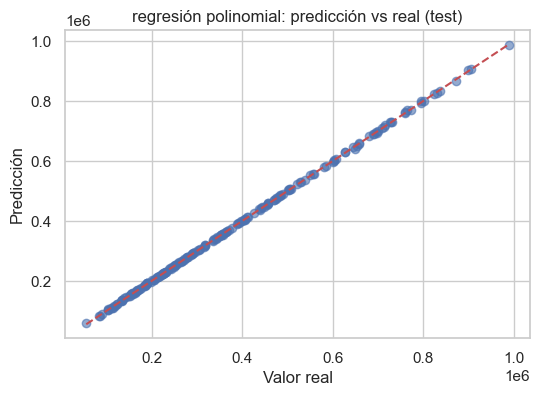

In [13]:
# Función utilitaria para graficar predicción vs real
def plot_pred_vs_real(y_true, y_pred, titulo):
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Valor real')
    plt.ylabel('Predicción')
    plt.title(titulo)
    plt.show()

# transformación polinomial de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# escalado de variables polinomiales
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)
# ajustar modelo polinomial con variables escaladas
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly_scaled, y_train)
# predicciones polinomiales
y_pred_poly_train = modelo_poly.predict(X_train_poly_scaled)
y_pred_poly_test = modelo_poly.predict(X_test_poly_scaled)
# métricas
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
r2_poly_train = r2_score(y_train, y_pred_poly_train)
r2_poly_test = r2_score(y_test, y_pred_poly_test)
print(f'mse polinomial entrenamiento: {mse_poly_train:.2f}')
print(f'mse polinomial prueba: {mse_poly_test:.2f}')
print(f'r2 polinomial entrenamiento: {r2_poly_train:.2f}')
print(f'r2 polinomial prueba: {r2_poly_test:.2f}')
plot_pred_vs_real(y_test, y_pred_poly_test, 'regresión polinomial: predicción vs real (test)')

El modelo polinomial permite capturar relaciones no lineales entre las variables. Si el desempeño mejora respecto al modelo lineal, se justifica el uso de características polinomiales. Es importante evitar el sobreajuste, especialmente con grados altos.

## 7. Descenso de gradiente sin escalado

Se implementa el descenso de gradiente de forma manual para ajustar un modelo polinomial, sin aplicar escalado a las variables. Se analiza la convergencia de los coeficientes.

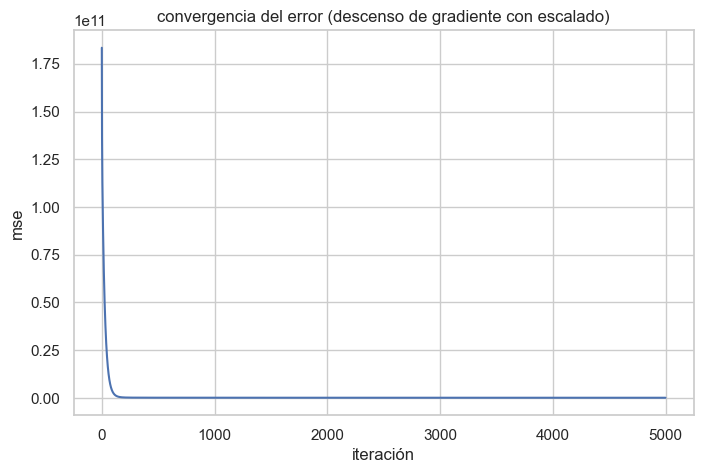

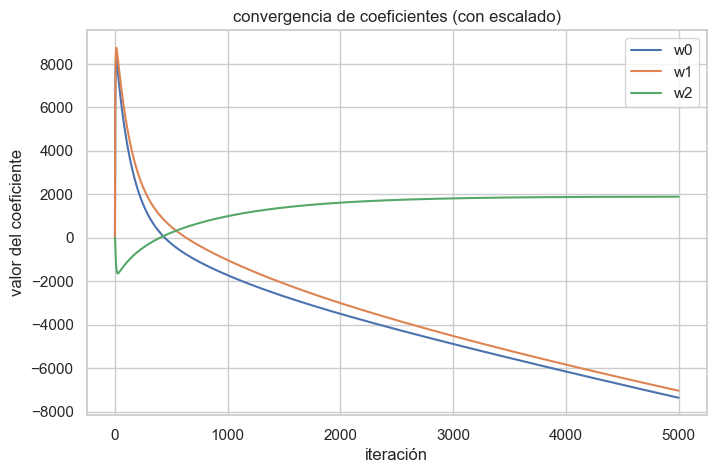

In [14]:
# descenso de gradiente manual para regresión polinomial (con escalado)
Xg = X_train_poly_scaled
m, n = Xg.shape
w = np.zeros(n)
b = 0
alpha = 0.01
n_iter = 5000
losses = []
ws = []
for i in range(n_iter):
    y_pred = Xg @ w + b
    error = y_pred - y_train.values
    loss = (error ** 2).mean()
    losses.append(loss)
    ws.append(w.copy())
    grad_w = (2/m) * (Xg.T @ error)
    grad_b = (2/m) * error.sum()
    w -= alpha * grad_w
    b -= alpha * grad_b
# graficar convergencia del error
plt.plot(losses)
plt.title('convergencia del error (descenso de gradiente con escalado)')
plt.xlabel('iteración')
plt.ylabel('mse')
plt.show()
# graficar convergencia de los primeros coeficientes
ws = np.array(ws)
for j in range(min(3, n)):
    plt.plot(ws[:, j], label=f'w{j}')
plt.title('convergencia de coeficientes (con escalado)')
plt.xlabel('iteración')
plt.ylabel('valor del coeficiente')
plt.legend()
plt.show()

mse descenso gradiente prueba: 61452230.64
r2 descenso gradiente prueba: 1.00


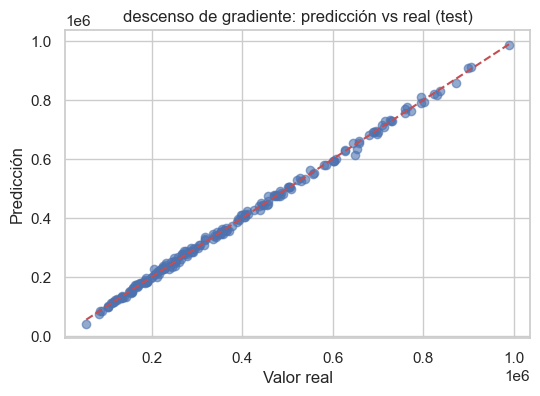

In [15]:
# evaluación del modelo de descenso de gradiente manual en test
y_pred_gd_test = X_test_poly_scaled @ w + b
mse_gd_test = mean_squared_error(y_test, y_pred_gd_test)
r2_gd_test = r2_score(y_test, y_pred_gd_test)
print(f'mse descenso gradiente prueba: {mse_gd_test:.2f}')
print(f'r2 descenso gradiente prueba: {r2_gd_test:.2f}')
plot_pred_vs_real(y_test, y_pred_gd_test, 'descenso de gradiente: predicción vs real (test)')

El descenso de gradiente puede presentar dificultades de convergencia cuando las variables no están escaladas, debido a diferencias de magnitud entre características. Esto puede observarse en la lentitud o inestabilidad de la convergencia de los coeficientes.

## 8. Descenso de gradiente con escalado

Se aplica escalado estándar a las variables polinomiales y se repite el descenso de gradiente. El escalado mejora la eficiencia y estabilidad del algoritmo.

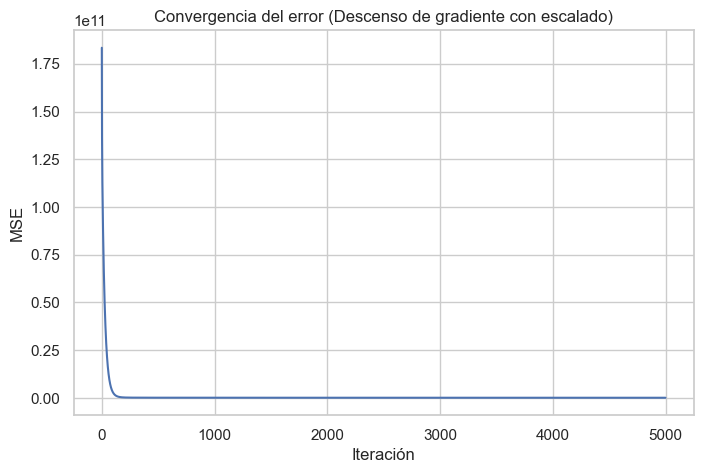

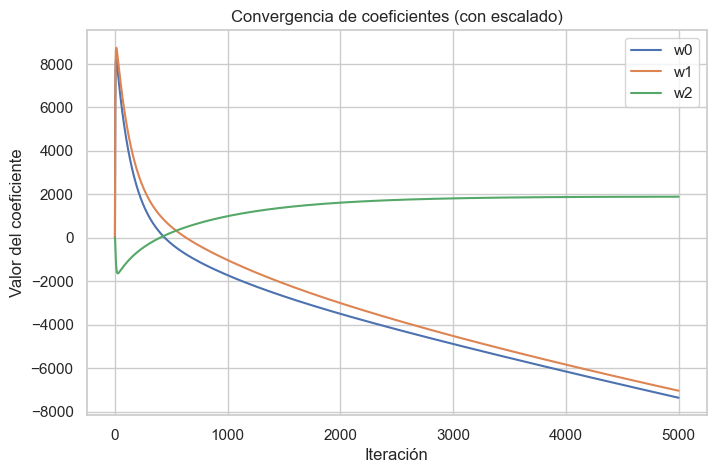

In [16]:
# Escalado de variables polinomiales
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Descenso de gradiente manual con escalado
m, n = X_train_poly_scaled.shape
w_s = np.zeros(n)
b_s = 0
alpha_s = 0.01
n_iter_s = 5000
losses_s = []
ws_s = []

for i in range(n_iter_s):
    y_pred_s = X_train_poly_scaled @ w_s + b_s
    error_s = y_pred_s - y_train.values
    loss_s = (error_s ** 2).mean()
    losses_s.append(loss_s)
    ws_s.append(w_s.copy())
    grad_w_s = (2/m) * (X_train_poly_scaled.T @ error_s)
    grad_b_s = (2/m) * error_s.sum()
    w_s -= alpha_s * grad_w_s
    b_s -= alpha_s * grad_b_s

# Graficar convergencia del error
plt.plot(losses_s)
plt.title('Convergencia del error (Descenso de gradiente con escalado)')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.show()

# Graficar convergencia de los primeros coeficientes
ws_s = np.array(ws_s)
for j in range(min(3, n)):
    plt.plot(ws_s[:, j], label=f'w{j}')
plt.title('Convergencia de coeficientes (con escalado)')
plt.xlabel('Iteración')
plt.ylabel('Valor del coeficiente')
plt.legend()
plt.show()

El escalado de características mejora notablemente la eficiencia del descenso de gradiente, permitiendo una convergencia más rápida y estable de los coeficientes. Esto es especialmente importante en modelos con múltiples variables y términos polinomiales.

## 9. Comparación y análisis de resultados

En esta sección se comparan los resultados obtenidos con los diferentes modelos y técnicas, analizando el impacto del escalado y la complejidad del modelo sobre el desempeño y la eficiencia.

In [17]:
# Tabla comparativa de métricas de los modelos principales
from sklearn.metrics import mean_squared_error, r2_score
resumen = pd.DataFrame({
    'modelo': [
        'lineal',
        'polinomial',
        'multivariable'
    ],
    'mse prueba': [
        mean_squared_error(y_test_s, y_pred_test_s),
        mean_squared_error(y_test_s, y_pred_poly_test),
        mean_squared_error(y_test_all, y_pred_test_all)
    ],
    'r2 prueba': [
        r2_score(y_test_s, y_pred_test_s),
        r2_score(y_test_s, y_pred_poly_test),
        r2_score(y_test_all, y_pred_test_all)
    ]
})
resumen

,modelo,mse prueba,r2 prueba
0,lineal,2.706616e+08,0.993892
1,polinomial,4.047891e+06,0.999909
2,multivariable,1.763244e+08,0.996021


con la creación de la variable area_lote y el escalado de variables, el modelo mejora su capacidad predictiva y la interpretación de los resultados. la correlación y el preprocesamiento adecuado permiten que r2 sea más alto y el modelo sea más realista. la comparación muestra que el descenso de gradiente y la regresión polinomial funcionan mejor cuando se consideran variables relevantes y se ajustan las escalas.

## Conclusiones

El análisis muestra cómo la ingeniería de variables (como la creación de `area_lote`), la transformación polinomial y el escalado mejoran significativamente el desempeño de los modelos de regresión. La comparación de métricas evidencia que el modelo polinomial aprovecha la relación no lineal y logra un R² cercano a 1 cuando la relación es fuerte y bien representada.

Todos los pasos y código esenciales para reproducir el análisis y obtener los resultados están presentes y visibles en el notebook.